<a href="https://colab.research.google.com/github/brukehk/Mini-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome:
Hey guys this is Harish.K , Welcome to my minor project for my Smartknower internship. I will be working with the famous "fruits-360" dataset from Kaggle . If you guys want to explore it , you can access it from [this link](https://www.kaggle.com/moltean/fruits) .
This particular dataset is relatively huge , so for my project purpose I will be using a subset of the dataset . I will be using 4 particular fruits from the given collection .

#Importing The Packages :
Initially we will be importing the required packages needed for our project . We use numpy and pandas packages for dataset creation and manipulation . Then we will import skimage package for loading our data from the system . Finally we import the required machine learning models for our project.


In [7]:

import numpy as np
import pandas as pd
import os
from skimage.io import imread
from sklearn import metrics
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from matplotlib import pyplot as plt
from skimage import data, color
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#Loading Datasets:
Now , without furthur adieu lets start loading the data from our system . The X and y_train refers to the raw training data and X1 and y_test refers to testing data . Now since we cannot train our model ina image data structure we my convert it into a numpy array and then normalize it by dividing all the image arrays with the pixel value which in our case is 100.0 .

Once the data normalization is done we reshape the data so that it is attuned to be used in the training model. 

In [8]:
Data_Path="/content/drive/MyDrive/mini_project/train/"
categories=["Apple Red 1","Banana","Mango","Watermelon"]
y_train=[]
X=[]
for i in categories:
    path=os.path.join(Data_Path,i)
    print(path)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img),plugin='matplotlib')
        Resized_img=resize(img_array,(100,100))
        X.append(Resized_img)
        if(i=="Apple Red 1"):
            y_train.append(0)
        elif(i=="Banana"):
            y_train.append(1)
        elif(i=="Mango"):
            y_train.append(2)
        elif(i=="Watermelon"):
            y_train.append(3)

/content/drive/MyDrive/mini_project/train/Apple Red 1
/content/drive/MyDrive/mini_project/train/Banana
/content/drive/MyDrive/mini_project/train/Mango
/content/drive/MyDrive/mini_project/train/Watermelon


In [9]:
datadir1="/content/drive/MyDrive/mini_project/test/"
category=["Apple Red 1","Banana","Mango","Watermelon"]
y_test=[]
X2=[]
for i in category:
    path=os.path.join(datadir1,i)
    print(path)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img),plugin='matplotlib')
        Resized_img=resize(img_array,(100,100))
        X2.append(Resized_img)
        if(i=="Apple Red 1"):
            y_test.append(0)
        elif(i=="Banana"):
            y_test.append(1)
        elif(i=="Mango"):
            y_test.append(2)
        elif(i=="Watermelon"):
            y_test.append(3)
        

/content/drive/MyDrive/mini_project/test/Apple Red 1
/content/drive/MyDrive/mini_project/test/Banana
/content/drive/MyDrive/mini_project/test/Mango
/content/drive/MyDrive/mini_project/test/Watermelon


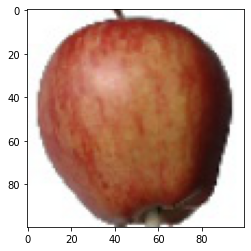

In [10]:
plt.imshow(X[10])

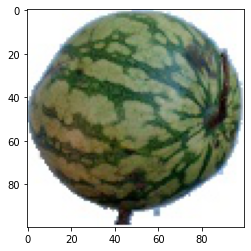

In [11]:
plt.imshow(X[-10])

In [12]:
X_train=np.asarray(X)
X_train=X_train/100.0
X_train.shape

(1947, 100, 100, 3)

In [13]:
np.unique(y_train)

array([0, 1, 2, 3])

In [14]:
nsamples, nx, ny,a  = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny*a))
X_train.shape

(1947, 30000)

In [15]:
X_test=np.asarray(X2)
X_test=X_test/100.0
X_test.shape

(644, 100, 100, 3)

In [16]:
nsamples, nx, ny , col  = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny*col))
X_test.shape

(644, 30000)

#Training And Testing Our Model:
To train our model we will be using the Voting Classifier ensemble model.It is a simple way that aggregates the prediction of each classifier and predict the class that get the most votes.
Once the model is trained we will test it in the testing dataset and predict for a particular image to show its working.


In [17]:
lgclf=LogisticRegression()
rmclf=RandomForestClassifier()
svmclf=SVC()

In [18]:
votingclf=VotingClassifier(estimators=[('lr',lgclf),('rf',rmclf),('svc',svmclf)],voting="hard")

In [19]:
for clf in (lgclf,rmclf,svmclf,votingclf ):
  clf.fit(X_train,y_train)
  pr=clf.predict(X_test)
  print(clf.__class__.__name__,accuracy_score(y_test,pr))

LogisticRegression 1.0
RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


Predicted Answer : Banana
Correct Answer: Banana


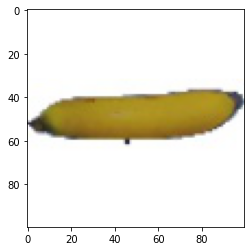

In [20]:
predicted=votingclf.predict(X_test[[300]])
if(predicted==0):
    print("Predicted Answer : Apple")
if(predicted==1):
    print("Predicted Answer : Banana")
if(predicted==2):
    print("Predicted Answer : Mango(Raw)")
if(predicted==3):
    print("Predicted Answer : Watermelon")
plt.imshow(X2[300])
targetclf=["Apple","Banana","Mango(Raw)","Watermelon"]
print("Correct Answer: "+targetclf[y_test[300]])

#Conclusion : 
WOW !! The model produced a 100% accuracy and works perfectly fine for any manual inputs. 

###Thank You